In [6]:
def nablaT(G):
    h, w = G.shape[:2]
    I = np.zeros((h, w), G.dtype)
    # note that we just reversed left and right sides
    # of each line to obtain the transposed operator
    I[:, :-1] -= G[:, :-1, 0]
    I[:, 1: ] += G[:, :-1, 0]
    I[:-1]    -= G[:-1, :, 1]
    I[1: ]    += G[:-1, :, 1]
    return I

def nabla(I):
    h, w = I.shape
    G = np.zeros((h, w, 2), I.dtype)
    G[:, :-1, 0] -= I[:, :-1]
    G[:, :-1, 0] += I[:, 1:]
    G[:-1, :, 1] -= I[:-1]
    G[:-1, :, 1] += I[1:]
    return G

def anorm2(a):
    return (a*a).sum(-1)
def anorm(a):
    return np.sqrt( anorm2(a) )

def project_nd(P, r):
    '''perform a pixel-wise projection onto R-radius balls'''
    nP = np.maximum(1.0, anorm(P)/r)
    return P / nP[...,np.newaxis]


    height, width, channels 10 10 3
new.ndim, new.size 2 30
imgs.ndim, imgs.size 3 300
Y IN LOOP IS  0
X:  [[227.86403369 254.87224535 222.83306916]
 [223.83577831 244.80956315 254.81839487]
 [254.86343305 237.80634207 254.90641719]
 [225.83245321 248.81478329 240.79049409]
 [225.87652446 219.81827246 238.78538295]
 [200.84903524 230.82756047 249.80313458]
 [238.82860469 238.85935727 244.79942017]
 [220.8363055  248.80120184 254.85905908]
 [254.82912279 247.79657961 254.89171573]
 [254.88       254.85171573 243.74      ]]
.
X:  [[227.93796101 254.62256454 223.11125999]
 [223.85698732 244.68951544 254.68737404]
 [254.65556201 237.78441183 254.81077877]
 [225.74704373 248.54399066 240.72105307]
 [225.66826259 219.84080443 238.83078816]
 [200.7841253  230.67512502 249.68629823]
 [238.59727628 238.77855154 244.77890311]
 [220.81260815 248.61554869 254.78760603]
 [254.59852982 247.81866736 254.77518871]
 [254.83263282 254.67058133 244.02      ]]
X:  [[228.01145681 254.37284928 223.36159471]

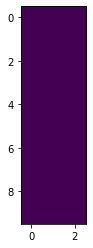

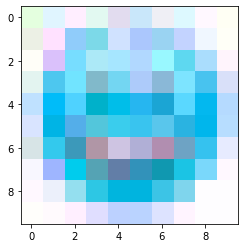

In [14]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
#from nbutils import showarray
from matplotlib import pyplot as plt
import scipy
import skimage
  
#img_ref = lena()[140:,120:][:256,:256] / 255.0
img_ref = cv2.imread("smiley.jpg")


def solve_TVL1_multy(imgs, clambda, iter_n=101):
    # setting step sizes and other params
    L2 = 8.0
    tau = 0.02
    sigma = 1.0 / (L2*tau)
    theta = 1.0
    height, width, channels = imgs.shape
    print("    height, width, channels",    height, width, channels)
    #new = imgs.copy()
    new = np.zeros((10,3))
    print("new.ndim, new.size", new.ndim, new.size)
    print("imgs.ndim, imgs.size", imgs.ndim, imgs.size)
    #imgs = np.array(imgs)
    #inputIm = np.asarray(inputIm)
    imArr  = np.asarray(imgs)
    for y in range(0, height):
        print("Y IN LOOP IS ", y)
        X = imArr[y].copy()
        #X = imgs[0].copy()
        P = nabla(X)
        Rs = np.zeros_like(imgs)
        
            #for i in range(iter_n):
        for x in range(0, width):
            P = project_nd( P + sigma*nabla(X), 1.0 )
            Rs = np.clip(Rs + sigma*(X-imgs), -clambda, clambda)
            X1 = X - tau*(nablaT(P) + Rs.sum(0))
            X = X1 + theta * (X1 - X)
            print("X: ", X),
            #X = np.round(X)
            #X = np.asarray(X)
            #print("XTYPE", type(X))
            X.astype(int)
            if x % 10 == 0:
                print("."),
        #new[y] = X
        print("X", X),
        print("new[y]", new[y]),
        print("imgs[y]", imgs[y]),
    return new

#print("img_ref", img_ref)
#print("img_ref", img_ref)
imgO = solve_TVL1_multy(img_ref, 0.5)
#print("imgO",imgO)
plt.imshow(imgO)
plt.show()
plt.imshow(img_ref)
plt.show()

height, width, channels 10 10 3
new.ndim, new.size 2 0
imgs.ndim, imgs.size 3 300
X [[228 255 223]
 [224 245 255]
 [255 238 255]
 [226 249 241]
 [226 220 239]
 [201 231 250]
 [239 239 245]
 [221 249 255]
 [255 248 255]
 [255 255 244]]
X2 [[227.86403369 254.87224535 222.83306916]
 [223.83577831 244.80956315 254.81839487]
 [254.86343305 237.80634207 254.90641719]
 [225.83245321 248.81478329 240.79049409]
 [225.87652446 219.81827246 238.78538295]
 [200.84903524 230.82756047 249.80313458]
 [238.82860469 238.85935727 244.79942017]
 [220.8363055  248.80120184 254.85905908]
 [254.82912279 247.79657961 254.89171573]
 [254.88       254.85171573 243.74      ]]
X [[236 240 229]
 [255 225 255]
 [144 204 250]
 [124 217 232]
 [208 226 255]
 [171 199 253]
 [154 211 242]
 [195 211 255]
 [240 247 255]
 [255 255 247]]
X2 [[235.86738241 239.86832621 228.8314839 ]
 [254.85612467 224.80302625 254.85493472]
 [143.84702251 203.83983671 249.78150762]
 [123.83772881 216.83431716 231.78570028]
 [207.83633074 22

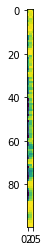

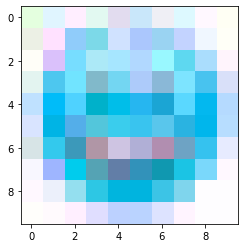

In [13]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
#from nbutils import showarray
from matplotlib import pyplot as plt
import scipy
import skimage
  
#img_ref = lena()[140:,120:][:256,:256] / 255.0
img_ref = cv2.imread("smiley.jpg")
#print(img_ref)
def solve_TVL1_multy(img, iter_n=101):
    # setting step sizes and other params
    L2 = 8.0
    tau = 0.02
    sigma = 1.0 / (L2*tau)
    theta = 1.0
    clambda = 0.5
    height, width, channels = img.shape
    print("height, width, channels",    height, width, channels)
    #new = imgs.copy()
    new = np.zeros((0,3))
    print("new.ndim, new.size", new.ndim, new.size)
    print("imgs.ndim, imgs.size", img.ndim, img.size)
    #imgs = np.array(imgs)
    #inputIm = np.asarray(inputIm)
    imArr  = np.asarray(img)
    for y in range(0, height):
        X = img[y].copy()
        P = nabla(X)
        Rs = np.zeros_like(img[y])
        print("X",X),
        #print("Rs",Rs),
        #for x in range(0, width):
        P = project_nd( P + sigma*nabla(X), 1.0 )
        Rs =  np.clip(Rs + sigma*(X-img), -clambda, clambda)
        X1 = X - tau*(nablaT(P) + Rs.sum(0))
        X = X1 + theta * (X1 - X)
        print("X2",X),
        new = np.concatenate((new,X), axis=0)
    print("new", new)        
    return new

#print("img_ref", img_ref)
#print("img_ref", img_ref)
imgO = solve_TVL1_multy(img_ref, 0.5)
#print("imgO",imgO)
plt.imshow(imgO)
plt.show()
plt.imshow(img_ref)
plt.show()